In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
# pd.set_option('display.max_rows',1000)
from datetime import datetime
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn')
import seaborn as sns
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [4]:
import folium
import requests
import json
import branca

# 데이터 불러오기

In [34]:
# Master Table
df = pd.read_csv('data/cluster/2차군집8_비인도데프.csv')

In [35]:
# 분기 리스트
list_quarter = ['2017_1Q','2017_2Q','2017_3Q','2017_4Q','2018_1Q','2018_2Q','2018_3Q','2018_4Q',
                '2019_1Q','2019_2Q','2019_3Q','2019_4Q','2020_1Q','2020_2Q','2020_3Q','2020_4Q','2021_1Q','2021_2Q']

# 분기별 데이터프레임 생성
for i in list_quarter:
    globals()['df_{}'.format(i)] = df[df['quarter']== i]

In [36]:
type(df_2017_1Q[df_2017_1Q.cluster==1].describe().iloc[1,:])

pandas.core.series.Series

In [37]:
# 평균리스트
list_mean = []

# 2017년도 1분기 데이터에서 1차군집이 n번 군집인 데이터의 평균 Series를 리스트에 저장
for i in range(1,8):
    list_mean.append(df_2017_1Q[df_2017_1Q['cluster']==i].describe().iloc[1,:])

In [38]:
# 리스트 원소(평균 Series)들을 concat하여 평균 데이터프레임 생성
df_cluster_2017_1Q = pd.concat(list_mean,axis=1)

# 평균 테이블을 Transpose + 리인덱싱
df_cluster_2017_1Q = df_cluster_2017_1Q.T.reset_index(drop=True)

#  최대 5점을 기준으로 각 컬럼을 점수화 (백분율과 같은 원리)
df_cluster_2017_1Q = (df_cluster_2017_1Q / df_cluster_2017_1Q.max()) * 5

# 1차군집 컬럼 추가
df_cluster_2017_1Q.cluster = ['1','2','3','4','5','6','7']

# 확인
df_cluster_2017_1Q

---


# 레이더 차트 시각화

In [67]:
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

import matplotlib.colors as mcolors

In [93]:
print(my_palette)

['#00FFFF', '#1f77b4', '#FFDEAD', '#FFD700', '#FFA500', '#FF7F50', '#FF4500']


In [98]:
my_palette = [mcolors.CSS4_COLORS['lightskyblue'],mcolors.TABLEAU_COLORS['tab:blue'],mcolors.CSS4_COLORS['navajowhite'],mcolors.CSS4_COLORS['gold'],
             mcolors.CSS4_COLORS['orange'],mcolors.CSS4_COLORS['coral'],mcolors.CSS4_COLORS['orangered']]

<Figure size 3600x3600 with 0 Axes>

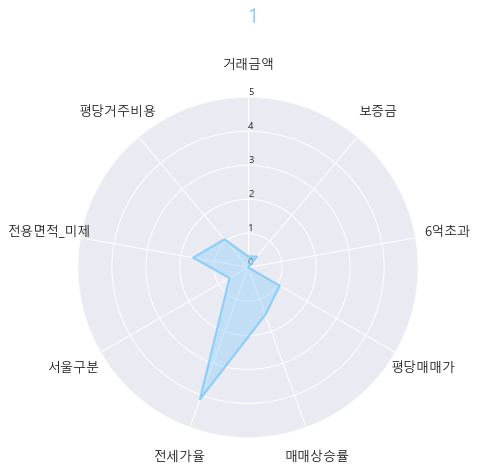

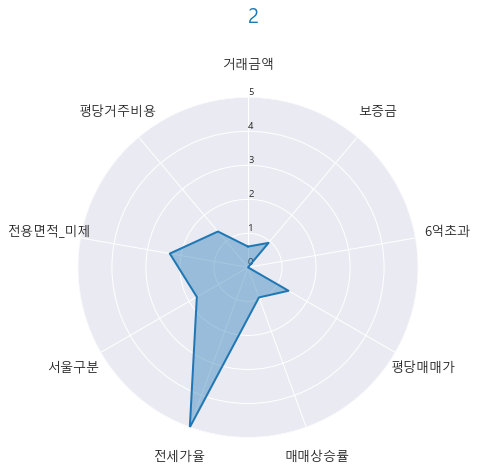

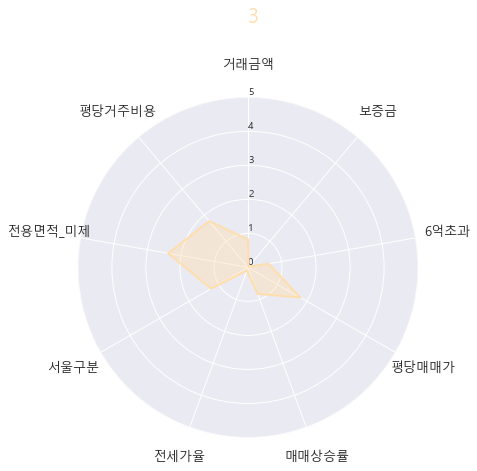

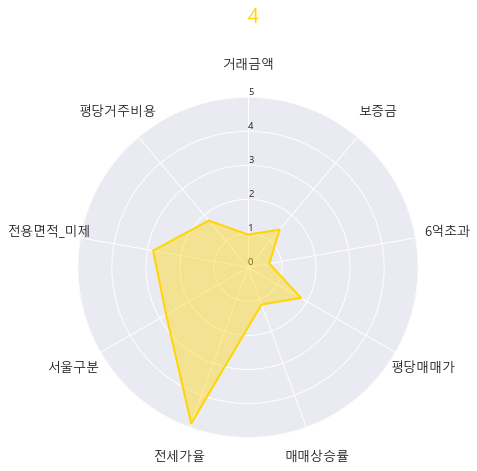

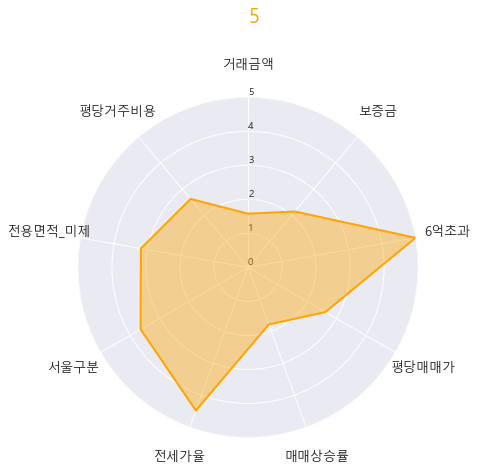

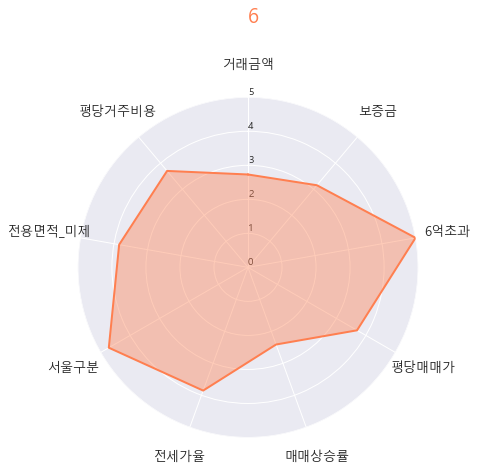

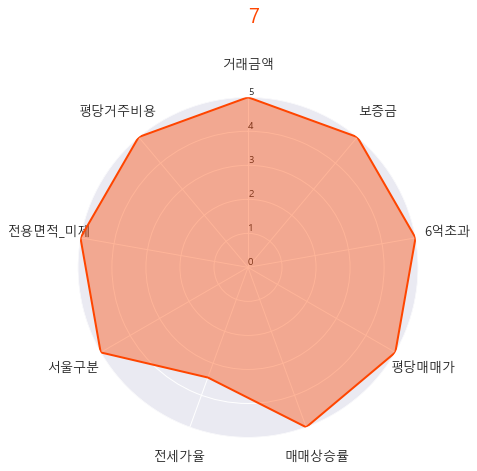

<Figure size 576x396 with 0 Axes>

In [99]:
# 레이더 차트 생성
df_list = [df_cluster_2017_1Q]
for df in df_list:
    labels = df.columns[[1,3,13,7,4,6,12,0,14]]
    num_labels = len(labels)
    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

    #my_palette = plt.cm.get_cmap("turbo", len(df.index))

    fig = plt.figure(figsize=(50,50))
    fig.set_facecolor('white')

    for i, row in df.iterrows():
        fig = plt.figure(figsize=(50,40))
        color = my_palette[i]
        data = df.iloc[i,[1,3,13,7,4,6,12,0,14]].tolist()
        data += data[:1]

        ax = plt.subplot(1,7,i+1, polar=True)
        ax.set_theta_offset(pi / 2) ## 시작점
        ax.set_theta_direction(-1) ## 그려지는 방향 시계방향

        plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
        ax.tick_params(axis='x', which='major', pad=25) ## x축과 눈금 사이에 여백을 준다.

        ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
        plt.yticks([0,1,2,3,4,5],['0','1','2','3','4','5'], fontsize=10) ## y축 눈금 설정
        plt.ylim(0,5)

        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
        ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

        plt.title(row.cluster, size=20, color=color,x=0.5, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
        plt.show()

    plt.tight_layout(pad=5) ## subplot간 패딩 조절
    plt.show()

### 2017년도 기준 군집별 id들로 2021년도 2분기 어떤 변화가 있는지 관찰

In [131]:
# 2017년도 1분기 1차 군집이 n번 군집인 데이터 프레임과 id리스트 생성
for i in range(1,8):
    globals()['df_cluster_{}'.format(i)] =  df_2017_1Q[df_2017_1Q['cluster']==i]            # n번 군집 데이터프레임
    globals()['list_{}'.format(i)]  = globals()['df_cluster_{}'.format(i)]['id'].to_list()  # n번 군집 d 리스트

In [138]:
# n번 군집 id 리스트를 리스트에 담기
list_all = [list_1,list_2,list_3,list_4,list_5,list_6,list_7]

In [137]:
# 2021년도 2분기 데이터에서 1번군집 id리스트에 해당하는 데이터 추출
df_2021_2Q[df_2021_2Q['id'].isin(list_1)]

,id,quarter,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,전세빈도,위도,경도,서울구분,6억초과,규제,평당거주비용,cluster,2nd_cluster
17,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2021_2Q,60.0,264.500000,2007.0,182.50,10.093652,0.000000,68.998110,14.694444,2.0,0.0,37.700477,126.899362,0,0,조정대상지역,0.399689,2,1
53,경기도 고양덕양구 고양동_삼성_60,2021_2Q,60.0,245.000000,1998.0,152.25,22.500000,-4.843750,62.142857,13.611111,1.0,2.0,37.702788,126.902507,0,0,조정대상지역,0.370222,1,1
71,경기도 고양덕양구 고양동_삼성_85,2021_2Q,85.0,240.700000,1998.0,254.00,0.000000,37.545126,105.525550,9.257692,0.0,6.0,37.702788,126.902507,0,0,조정대상지역,0.251809,2,1
89,경기도 고양덕양구 고양동_윤창_59,2021_2Q,59.0,150.000000,1997.0,140.00,13.421550,12.000000,93.333333,8.333333,3.0,2.0,37.706355,126.894616,0,0,조정대상지역,0.226667,1,1
107,경기도 고양덕양구 고양동_윤창_60,2021_2Q,60.0,155.000000,1997.0,135.00,0.000000,0.000000,87.096774,8.611111,0.0,1.0,37.706355,126.894616,0,0,조정대상지역,0.234222,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380213,인천광역시 중구 항동7가_라이프비취2차_72,2021_2Q,72.0,178.000000,1981.0,120.00,1.520913,0.840336,67.415730,8.090909,2.0,1.0,37.451878,126.606024,0,0,조정대상지역,0.220073,1,1
380231,인천광역시 중구 항동7가_라이프비취3차_126,2021_2Q,126.0,277.500000,1990.0,125.00,8.823529,0.000000,45.045045,7.302632,2.0,0.0,37.451878,126.606024,0,0,조정대상지역,0.198632,1,1
380249,인천광역시 중구 항동7가_라이프비취3차_164,2021_2Q,164.0,400.000000,1990.0,250.00,23.076923,0.000000,62.500000,8.163265,1.0,0.0,37.451878,126.606024,0,0,조정대상지역,0.222041,2,3
380267,인천광역시 중구 항동7가_라이프비취3차_85,2021_2Q,85.0,196.400000,1990.0,142.00,-2.990570,1.428571,72.301426,7.553846,5.0,6.0,37.451878,126.606024,0,0,조정대상지역,0.205465,1,1


In [140]:
# 2021년도 2분기 평균 리스트
list_mean_2021_2Q = []

# 2021년도 2분기 데이터에서 2017년도 1분기의 각 군집별 id에 해당하는 데이터의 평균 Series를 리스트에 저장.
for i in range(1,8):
    list_mean_2021_2Q.append(df_2021_2Q[df_2021_2Q['id'].isin(globals()['list_{}'.format(i)])].describe().iloc[1,:])

Index(['id', 'quarter', '전용면적_미제', '거래금액', '건축년도', '보증금', '매매상승률', '전세상승률',
       '전세가율', '평당매매가', '매매빈도', '전세빈도', '위도', '경도', '서울구분', '6억초과', '규제',
       '평당거주비용', 'cluster', '2nd_cluster'],
      dtype='object')


In [141]:
# 리스트 원소(평균 Series)들을 concat하여 평균 데이터프레임 생성
df_cluster_2021_2Q = pd.concat(list_mean_2021_2Q, axis=1)

# 평균 테이블을 Transpose + 리인덱싱
df_cluster_2021_2Q = df_cluster_2021_2Q.T.reset_index(drop=True)

#  최대 5점을 기준으로 각 컬럼을 점수화 (백분율과 같은 원리)
df_cluster_2021_2Q = (df_cluster_2021_2Q / (df_cluster_2021_2Q.max()/5))

# 1차군집 컬럼 추가
df_cluster_2021_2Q.cluster = ['1','2','3','4','5','6','7']

<Figure size 3600x3600 with 0 Axes>

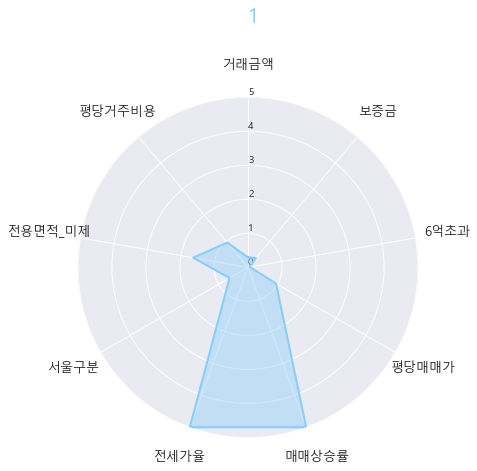

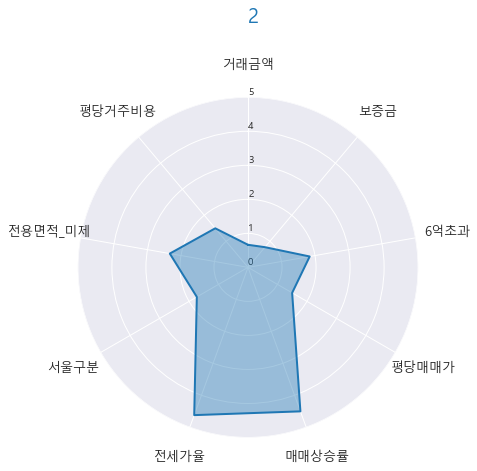

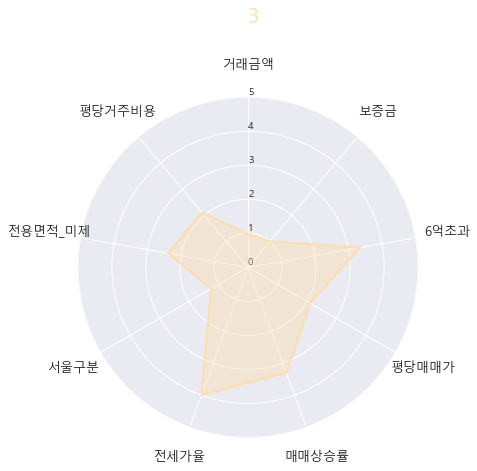

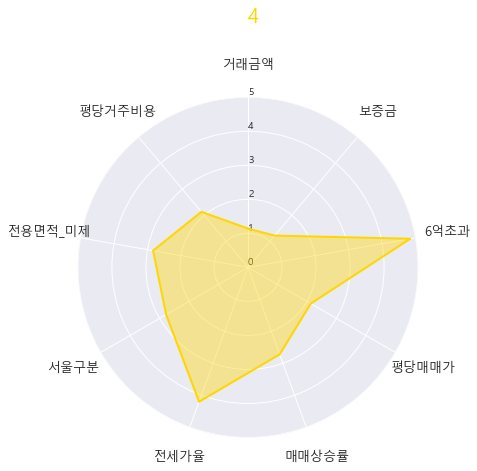

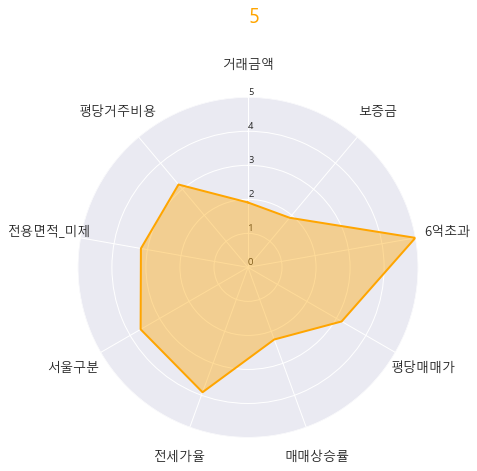

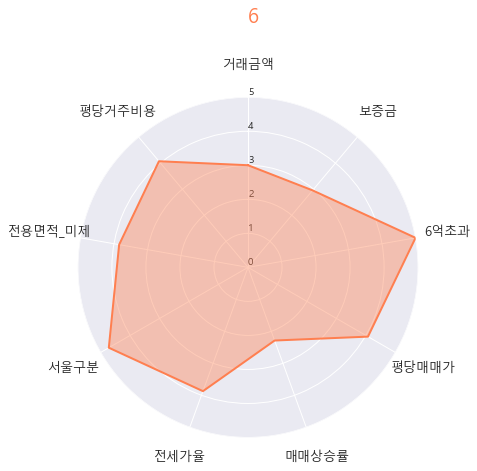

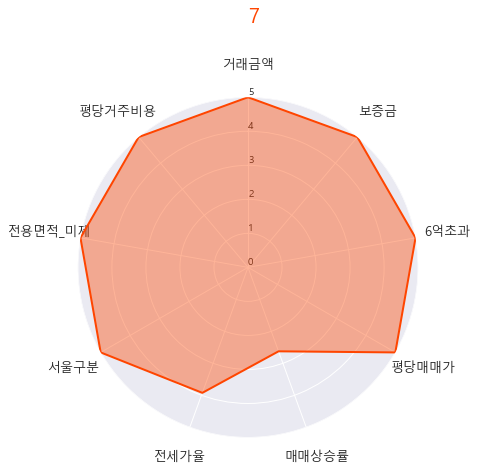

<Figure size 576x396 with 0 Axes>

In [145]:
# 2021년도 2분기 시각화
df_list = [df_cluster_2021_2Q]

for df in df_list:
    labels = df.columns[[1,3,13,7,4,6,12,0,14]]
    num_labels = len(labels)
    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

    #my_palette = plt.cm.get_cmap("turbo", len(df.index))

    fig = plt.figure(figsize=(50,50))
    fig.set_facecolor('white')

    for i, row in df.iterrows():
        fig = plt.figure(figsize=(50,40))
        color = my_palette[i]
        data = df.iloc[i,[1,3,13,7,4,6,12,0,14]].tolist()
        data += data[:1]

        ax = plt.subplot(1,7,i+1, polar=True)
        ax.set_theta_offset(pi / 2) ## 시작점
        ax.set_theta_direction(-1) ## 그려지는 방향 시계방향

        plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
        ax.tick_params(axis='x', which='major', pad=25) ## x축과 눈금 사이에 여백을 준다.

        ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
        plt.yticks([0,1,2,3,4,5],['0','1','2','3','4','5'], fontsize=10) ## y축 눈금 설정
        plt.ylim(0,5)

        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
        ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.

        plt.title(row.cluster, size=20, color=color,x=0.5, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
        plt.show()

    plt.tight_layout(pad=5) ## subplot간 패딩 조절
    plt.show()